Tutorials & Papers:  
[Cardinality Reduction](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/)  
[FA & PCA](https://www.dummies.com/programming/big-data/data-science/data-science-using-python-to-perform-factor-and-principal-component-analysis/)  
[Factor Analysis for Decomposition](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec19/using-factor-analysis-for-decomposition)  
[SKL Decomposition](http://scikit-learn.org/stable/modules/decomposition.html)  
[Clustering Mixed Data](https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data)  
[Box Cox Transformation (Power Tranform)](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)  
[Log Transforms](http://onlinestatbook.com/2/transformations/log.html)   
[SKL ensembling](http://scikit-learn.org/stable/modules/ensemble.html)  

Kaggle Kernels & Notebooks:  
[Good Overall Kaggle Kernel](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
[Applied Regression](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)  
[Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)  

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [5]:
infile = '../data/transformed_data/train_features.csv'
outfile_heuristic = './transformed_data/train_heuristic.csv'
outfile = '../data/transformed_data/train_engineered.csv'
cat_vars = ['MSSubClass', 'MSZoning', 'Neighborhood', 'LotConfig', 'HouseStyle', 'SaleType', 'SaleCondition' ]
num_vars = ['OverallQual', 'TotalArea', 'GarageCars', 'PropertyAge', 'HasPorch', 'HasDeck', 'SalePrice']

In [6]:
df = pd.read_csv(infile)
df.head()

,OverallQual,TotalArea,GarageCars,PropertyAge,MSSubClass,MSZoning,Neighborhood,HasPorch,HasDeck,LotConfig,HouseStyle,SaleType,SaleCondition,SalePrice
0,7,4276,2,5,60,RL,1,1,0,Inside,2Story,WD,Normal,208500
1,6,3786,2,31,20,RL,2,0,1,FR2,1Story,WD,Normal,181500
2,7,4492,2,7,60,RL,1,1,0,Inside,2Story,WD,Normal,223500
3,7,4190,3,91,70,RL,3,1,0,Corner,2Story,WD,Abnorml,140000
4,8,5541,3,8,60,RL,4,1,1,FR2,2Story,WD,Normal,250000


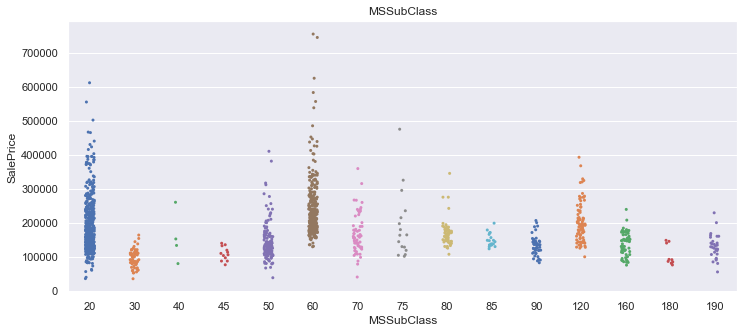

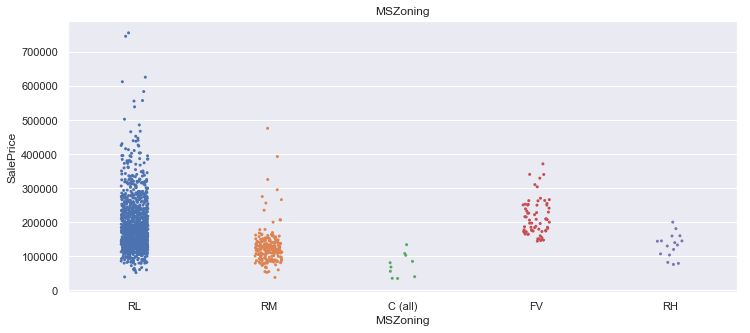

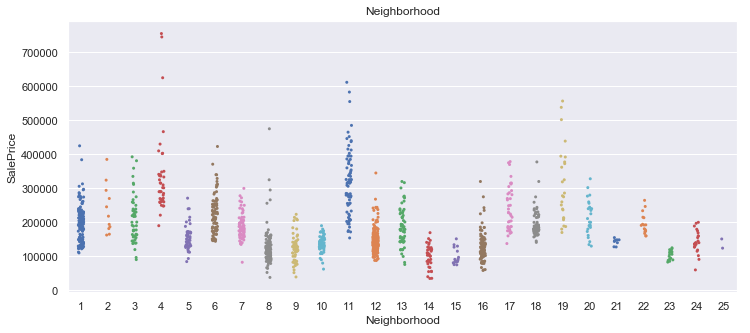

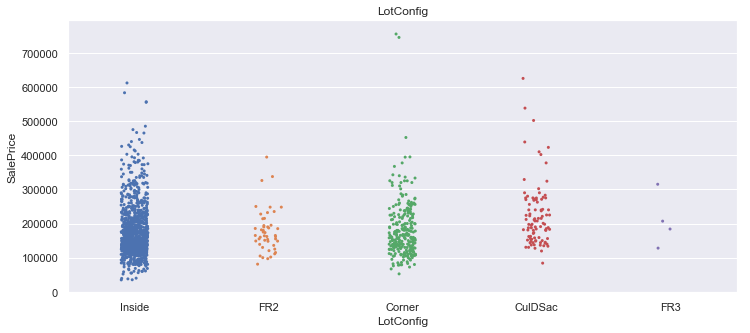

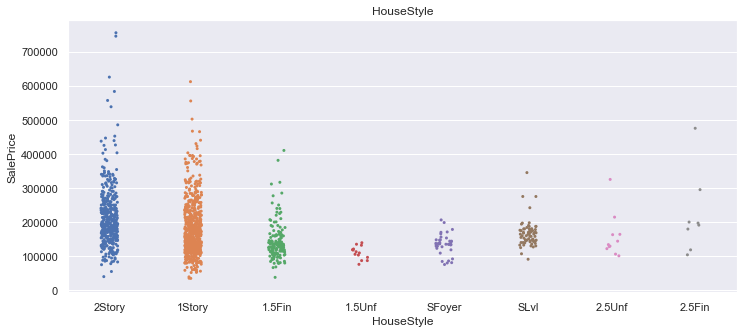

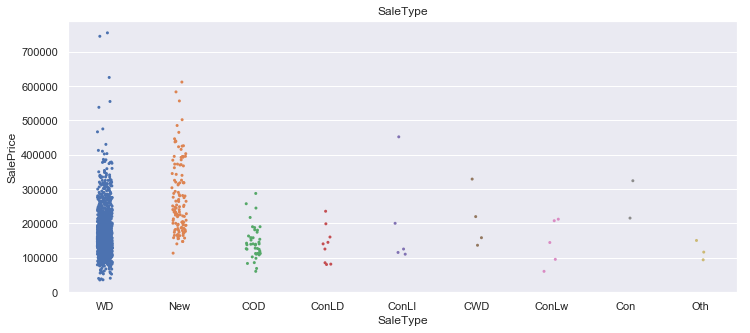

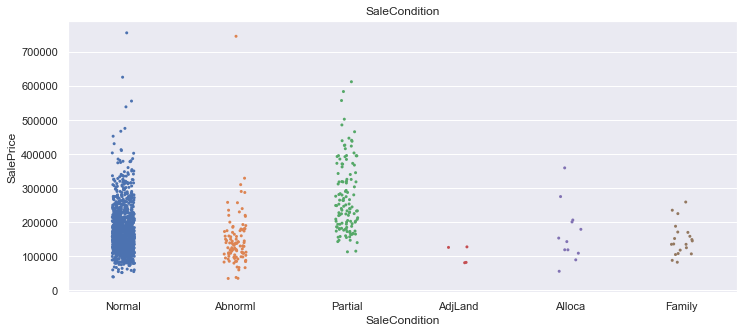

In [6]:
sns.set(font_scale=1)

for cat_var in cat_vars:
    plt.figure(figsize=(12,5))
    g = sns.stripplot(
        x=cat_var, 
        y='SalePrice', 
        data=df, 
        size=3,
        alpha=1,
        palette='deep',
        jitter=True
    )
    plt.title(cat_var)

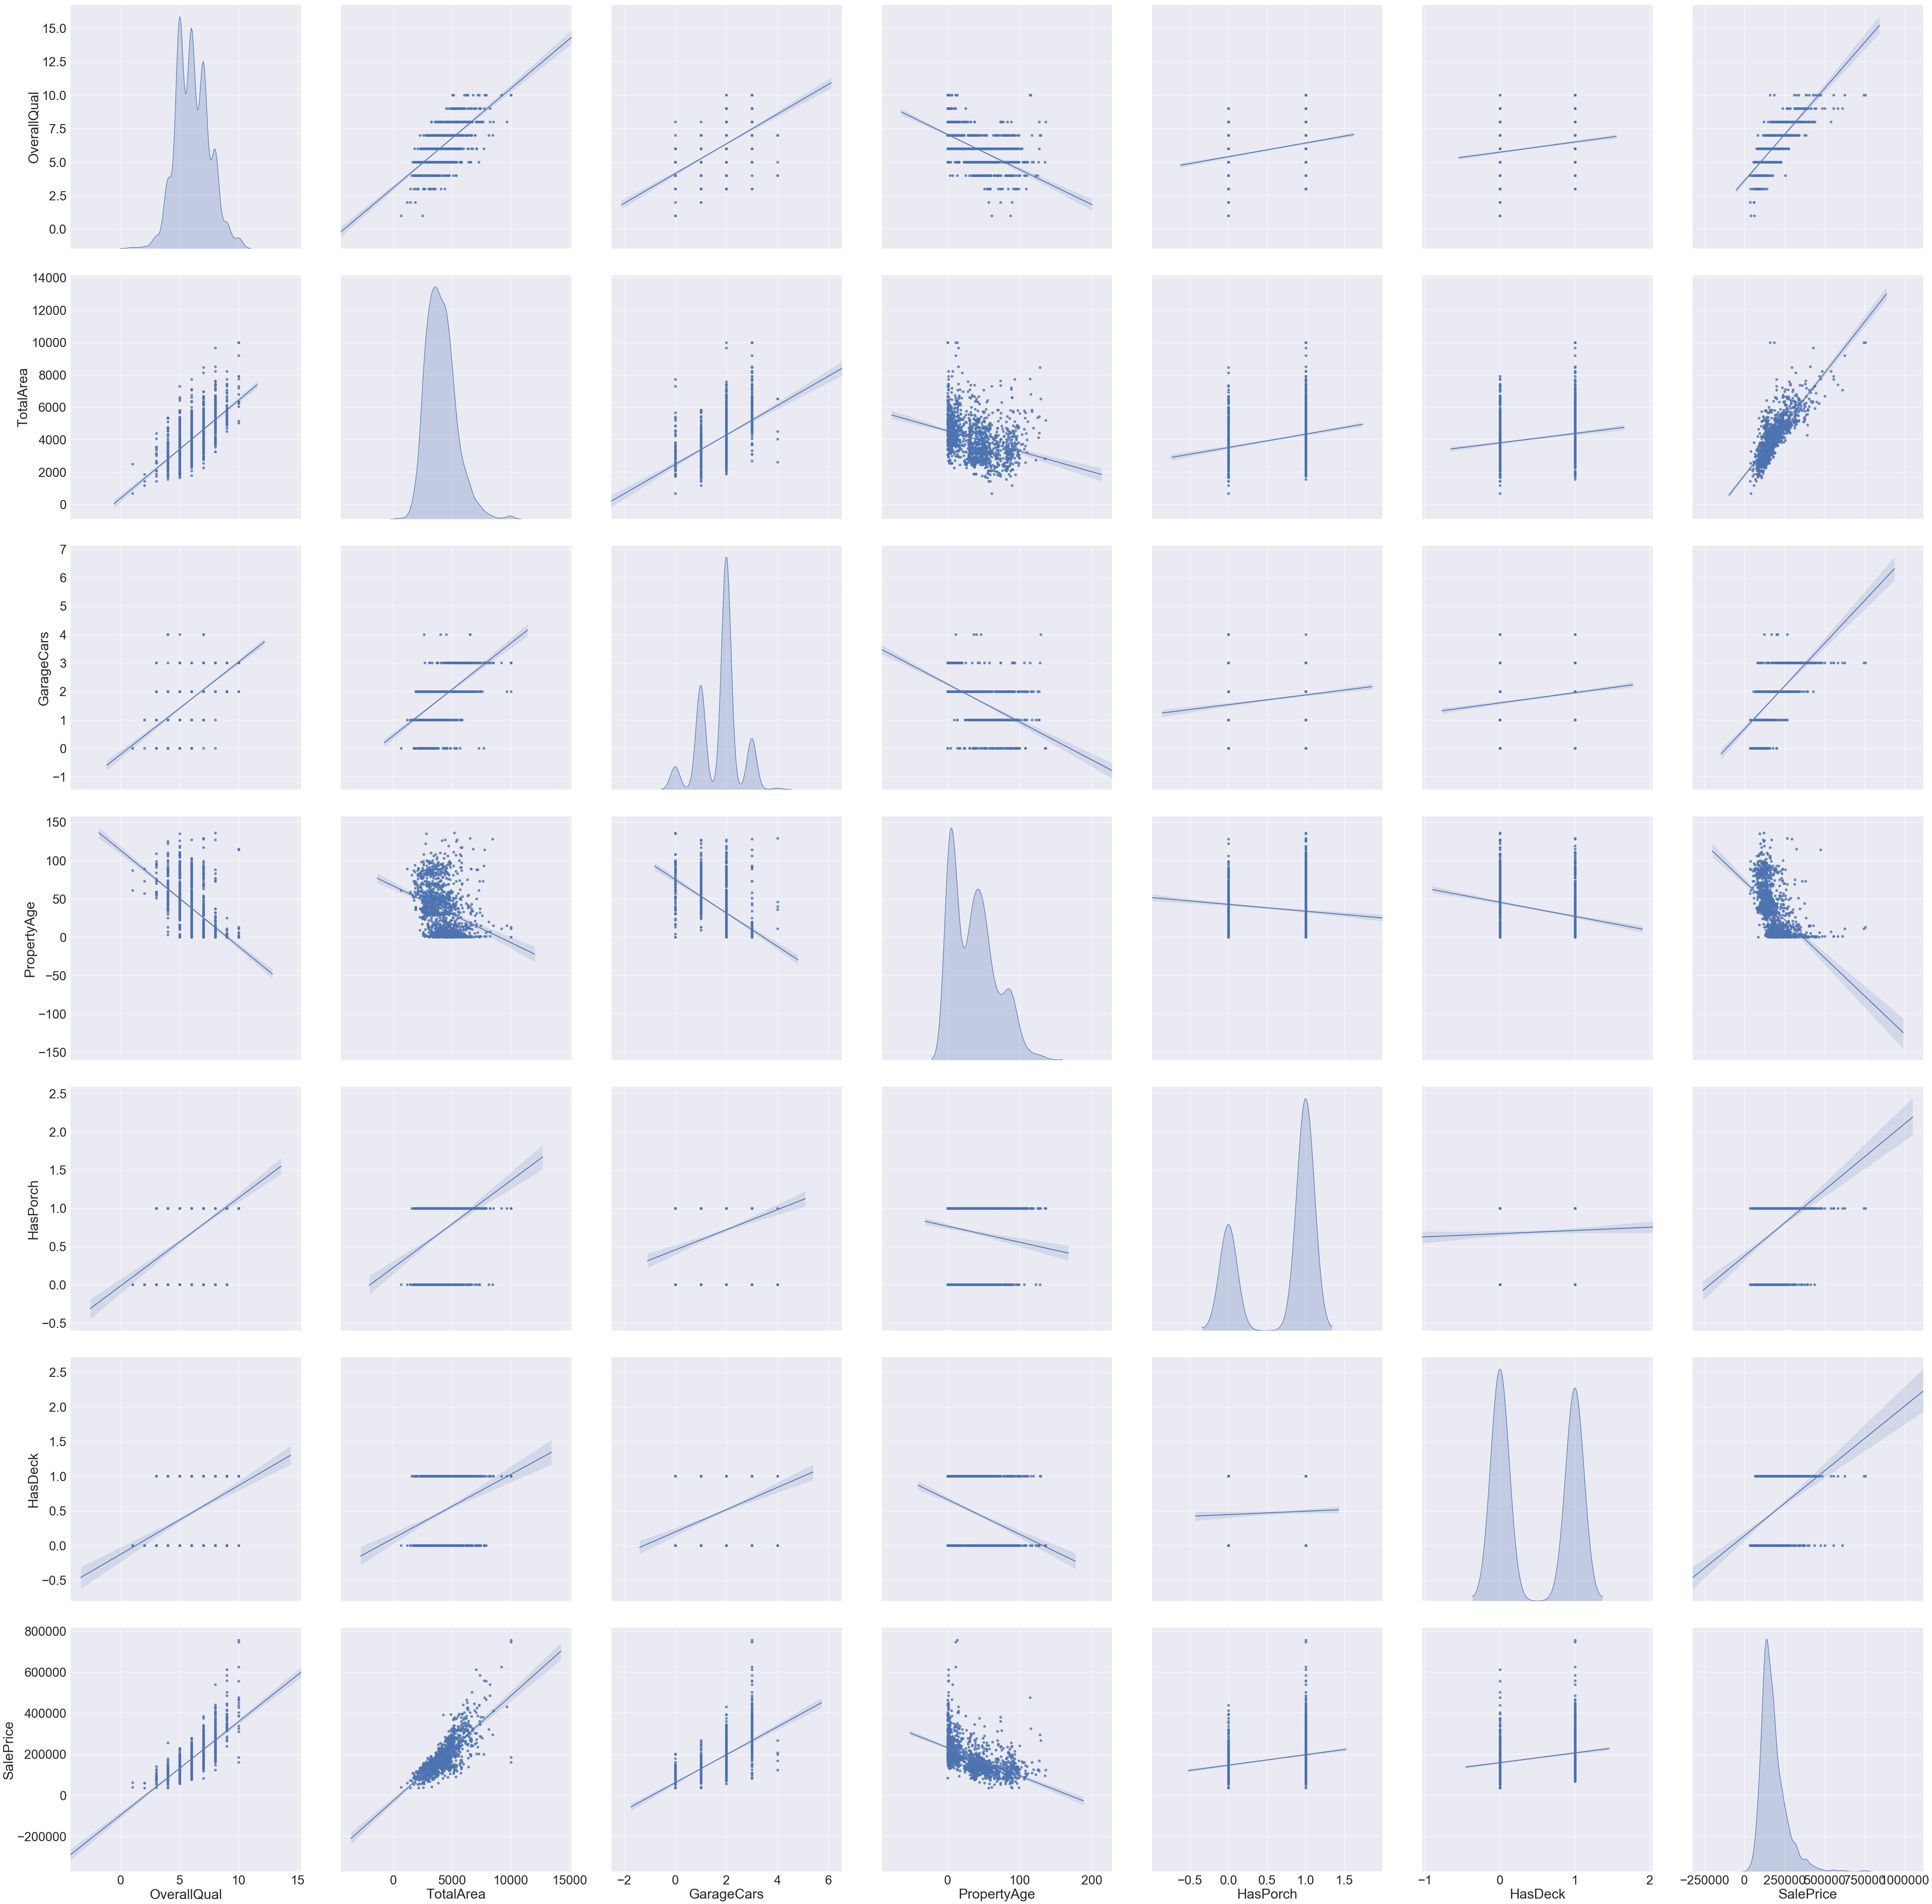

In [7]:
sns.set(font_scale=3)

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df[num_vars], 
    diag_kind='kde',
    kind="reg",
    size=10
)

In [8]:
df.to_csv(outfile_heuristic, index=False)

In [9]:
# Scaling

scaler = MinMaxScaler()
to_scale = ['TotalArea', 'PropertyAge', 'OverallQual']

for col in to_scale:
    arr = df[col].as_matrix()
    arr_sc = scaler.fit_transform(arr.reshape(-1, 1))
    df['{}_scaled'.format(col)] = arr_sc

count    1460.000000
mean       10.478082
std         5.837783
min         1.000000
25%         6.000000
50%        11.000000
75%        14.000000
max        25.000000
Name: Neighborhood, dtype: float64

,Neighborhood,mean,median,min,max,std,skew,cnt,mean_rank,median_rank,min_rank,max_rank,std_rank,skew_rank,cnt_rank
0,1,197965.77,197200,110000,424870,51403.67,0.93,150,17.0,17.0,14.0,21.0,16.0,16.0,24.0
1,2,238772.73,218000,162500,385000,72369.32,0.86,11,21.0,20.0,23.0,18.0,22.0,14.0,3.0
2,3,210624.73,200624,90350,392500,68866.40,0.78,51,18.0,19.0,13.0,19.0,21.0,12.5,14.0
3,4,335295.32,301500,190000,755000,121412.66,2.36,41,25.0,24.0,25.0,25.0,25.0,22.0,12.0
4,5,156270.12,153500,84500,271000,36486.63,0.94,49,12.0,12.0,11.0,10.0,11.0,17.0,13.0
5,6,225379.84,225500,144152,423000,56177.56,0.87,86,20.0,21.0,20.0,20.0,19.0,15.0,21.0
6,7,189050.07,182900,82500,299800,37172.22,0.59,73,14.0,15.0,9.0,11.0,12.0,10.0,17.0
7,8,128225.30,119000,37900,475000,52650.58,3.52,113,6.0,4.0,2.0,22.0,17.0,24.0,23.0
8,9,124834.05,124300,39300,223500,40348.69,0.47,58,4.0,6.0,3.0,8.0,13.0,8.0,15.0
9,10,136793.14,135000,62383,190000,22345.13,-0.42,74,7.0,7.0,6.0,6.0,4.0,2.0,18.0


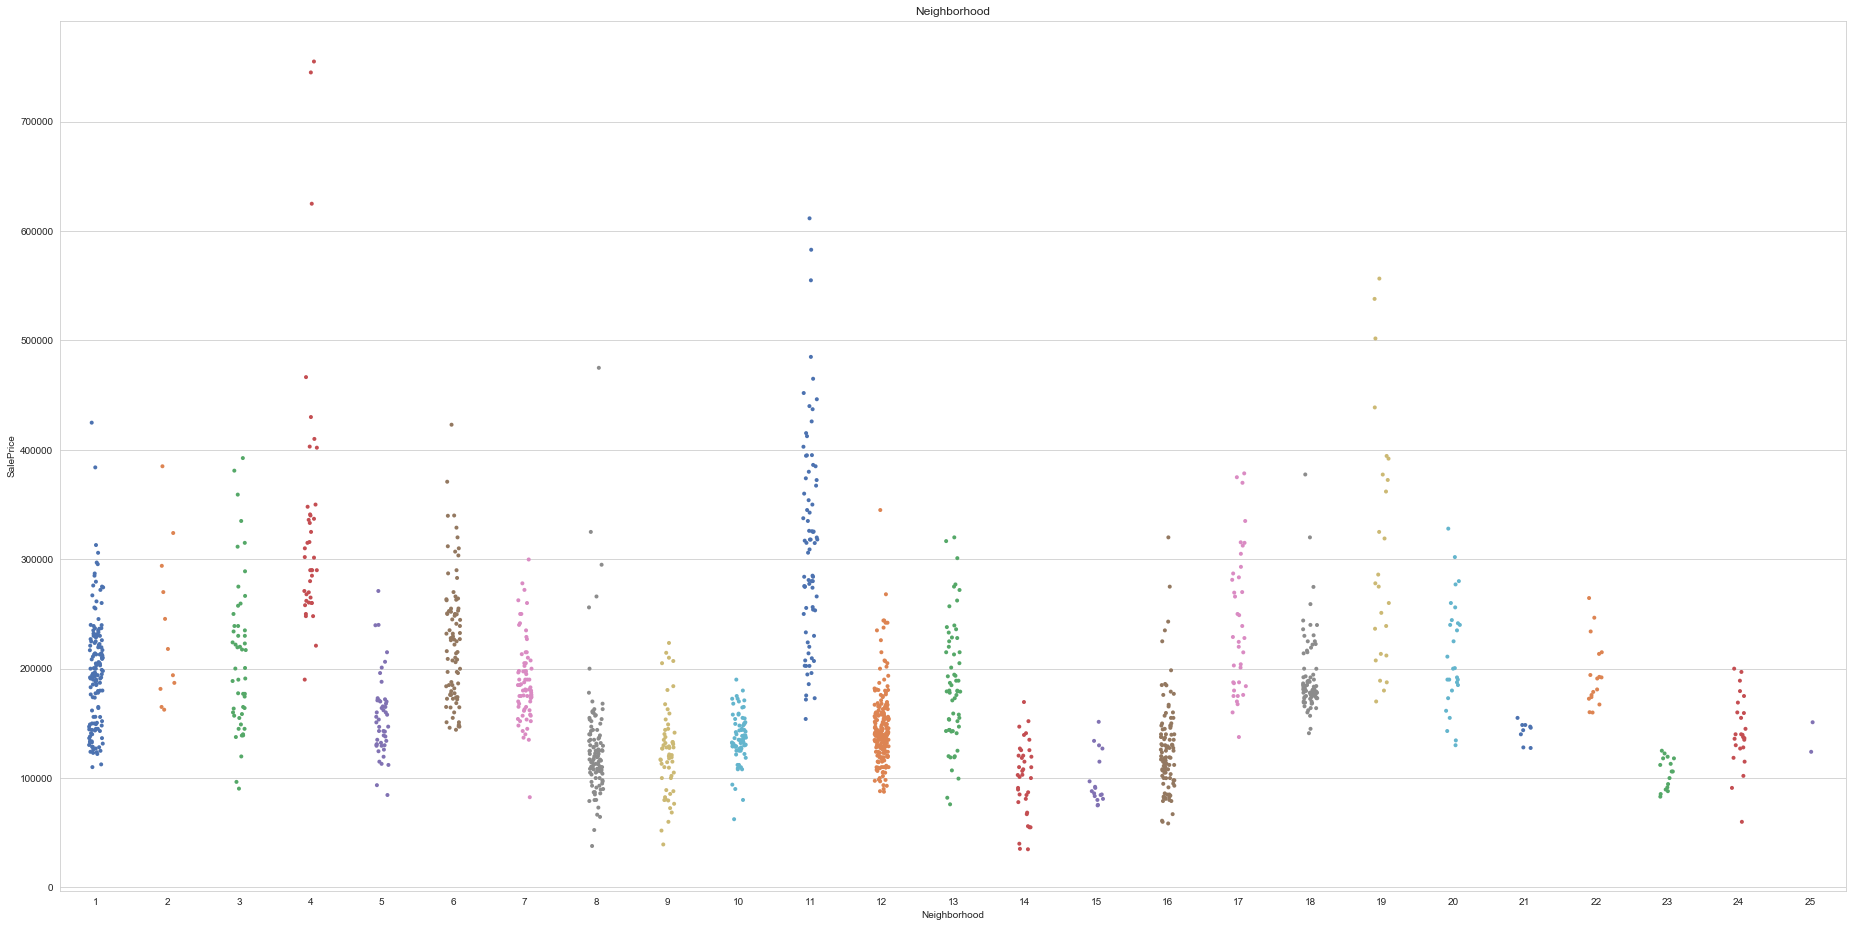

In [13]:
# Cardinality reduction

def stats_table(df, feature, target):
    '''
    Gets basic statistics & ranks for a variable.
    Returns a stripplot of the variable and a dataframe of the results
    '''
    
    # Stripplot
    plt.figure(figsize=(32,16))
    g = sns.stripplot(
        x=feature, 
        y=target, 
        data=df, 
        size=4,
        alpha=1,
        palette='deep',
        jitter=True
    )
    plt.title(feature)
    
    # Stats Table    
    tb_mean = df[[feature, target]].groupby(feature).mean()
    tb_med = df[[feature, target]].groupby(feature).median()
    tb_min = df[[feature, target]].groupby(feature).min()
    tb_max = df[[feature, target]].groupby(feature).max()
    tb_std = df[[feature, target]].groupby(feature).std()
    tb_skew = df[[feature, target]].groupby(feature).skew()
    tb_cnt = df[[feature, target]].groupby(feature).count()

    tb = pd.concat([tb_mean, tb_med, tb_min, tb_max, tb_std, tb_skew, tb_cnt], axis=1)
    tb.reset_index(inplace=True)
    tb.columns = [feature, 'mean', 'median', 'min', 'max', 'std', 'skew', 'cnt']
    tb = tb.round(2)

    cols = tb.columns.tolist()
    cols.remove(feature)

    for col in cols:
        tb['{}_rank'.format(col)] = tb[col].rank()
        
    return tb

tb = stats_table(df, 'Neighborhood', 'SalePrice')
tb

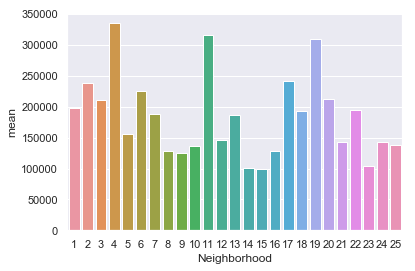

In [11]:
sns.set(font_scale=1)

sns.barplot(
    x="Neighborhood", 
    y="mean",
    data=tb_neigh.sort_values('median')
)

In [12]:
# Cardinality Reduction

neighborhood_codes = {
    1: 'Mid',
    2: 'Mid',
    3: 'Mid',
    4: 'High',
    5: 'Mid',
    6: 'Mid',
    7: 'Mid',
    8: 'Low',
    9: 'Low',
    10: 'Low',
    11: 'High',
    12: 'Low',
    13: 'Mid',
    14: 'Low',
    15: 'Low',
    16: 'Low',
    17: 'High',
    18: 'Mid',
    19: 'High',
    20: 'Mid',
    21: 'Low',
    22: 'Mid',
    23: 'Low',
    24: 'Mid',
    25: 'Mid'
}

df['Neighborhood'] = df['Neighborhood'].replace(neighborhood_codes)


def sale_condtion(row):
    '''
    '''
    if row['SaleCondition'] in ['AdjLand', 'Alloca', 'Family']:
        return 'Abnorml'
    else:
        return row['SaleCondition']
        
        
df['SaleCondition'] = df.apply(sale_condtion, axis=1)

In [8]:
# One hot encoding

one_hot_list = [
    'MSSubClass', 
    'MSZoning', 
    'Neighborhood', 
    'LotConfig', 
    'HouseStyle', 
    'SaleType', 
    'SaleCondition'
]

for var in one_hot_list:

    df_1h = pd.get_dummies(df[var])
    df_1h.columns = [
        '{}_{}'.format(var, x) for x in df_1h.columns
    ]
    df = pd.concat(
        [df, df_1h],
        axis=1
    )

In [9]:
np.log1p(train["SalePrice"])



NameError: name 'train' is not defined

In [14]:
df.to_csv(outfile, index=False)

In [15]:
df.head()

,OverallQual,TotalArea,GarageCars,PropertyAge,MSSubClass,MSZoning,Neighborhood,HasPorch,HasDeck,LotConfig,HouseStyle,SaleType,SaleCondition,SalePrice,TotalArea_scaled,PropertyAge_scaled,OverallQual_scaled,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_High,Neighborhood_Low,Neighborhood_Mid,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,7,4276,2,5,60,RL,Mid,1,0,Inside,2Story,WD,Normal,208500,0.386627,0.036765,0.666667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,6,3786,2,31,20,RL,Mid,0,1,FR2,1Story,WD,Normal,181500,0.334119,0.227941,0.555556,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,7,4492,2,7,60,RL,Mid,1,0,Inside,2Story,WD,Normal,223500,0.409773,0.051471,0.666667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,7,4190,3,91,70,RL,Mid,1,0,Corner,2Story,WD,Abnorml,140000,0.377411,0.669118,0.666667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,8,5541,3,8,60,RL,High,1,1,FR2,2Story,WD,Normal,250000,0.522182,0.058824,0.777778,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
